In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

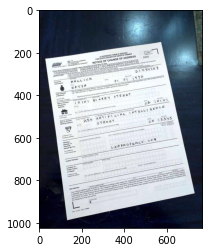

In [2]:
path = r'C:\Users\Clsm\Downloads\Original-Form-2.jpg'
img = cv2.imread(path)
plt.imshow(img)

In [3]:
# get image dimensions
img_height,img_width,channel = img.shape
img_center = (img_width//2, img_height//2) 
print("Image shape : ",img.shape)

# resize
if img_height > 1024 and img_width > 768:
  img = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)
  plt.figure()
  plt.imshow(img)

Image shape :  (1024, 768, 3)


In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# img_histeql = cv2.equalizeHist(img_gray)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_histeql = clahe.apply(img_gray)

# img_blur = cv2.bilateralFilter(img_gray, 100, 25, 25)  # 100, 25, 25
img_blur = cv2.medianBlur(img_gray, 3)

img_edges = cv2.Canny(img_blur, 0, 20)

In [8]:
# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(img_edges > 0))
angle = cv2.minAreaRect(coords)[-1]
# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
	angle = -(90 + angle)
# otherwise, just take the inverse of the angle to make
# it positive
else:
	angle = -angle

0.0


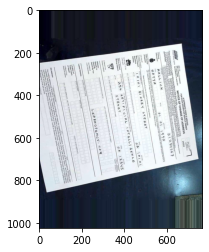

In [16]:
M = cv2.getRotationMatrix2D(img_center, -90, 1.0)
img_rotated = cv2.warpAffine(img, M, (img_width, img_height),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
plt.imshow(img_rotated)

In [17]:
import math

#lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 230  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(img_edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

print("No of lines : ",len(lines))

actual_lines = []
actual_points =[]
y_distance = 20

for line in lines:
    for x1,y1,x2,y2 in line:
        if len(actual_lines) == 0:
            actual_lines.append(y1)
            actual_points.append([x1,y1,x2,y2])
           
        else:
            is_needAdd =True
            for actual_y in actual_lines:
                if(np.abs(actual_y-y1) < y_distance):
                    is_needAdd = False
                    break
            
            if is_needAdd:
                actual_lines.append(y1)   
                actual_points.append([x1,y1,x2,y2])

print(actual_lines)

No of lines :  389
[440, 233, 486, 724, 744, 878, 176, 903, 822, 300, 145, 525, 1, 384, 22, 341, 52, 103, 788, 572, 677, 546, 465, 657, 604, 208, 81, 256, 986, 927, 280, 364, 847, 417, 624, 320]


[[622, 440, 765, 0], [141, 233, 543, 340], [10, 486, 583, 5], [135, 724, 509, 363], [232, 744, 603, 410], [238, 878, 332, 345], [324, 176, 447, 869], [288, 903, 386, 201], [27, 822, 667, 697], [258, 300, 549, 259], [117, 145, 244, 742], [169, 525, 571, 150], [380, 1, 506, 284], [550, 384, 590, 841], [315, 22, 763, 77], [452, 341, 639, 16], [319, 52, 758, 266], [698, 103, 713, 527], [337, 788, 636, 391], [182, 572, 663, 728], [127, 677, 542, 353], [120, 546, 401, 200], [160, 465, 275, 735], [195, 657, 460, 373], [169, 604, 538, 179], [462, 208, 484, 823], [320, 81, 569, 255], [120, 256, 363, 887], [132, 986, 515, 905], [6, 927, 583, 407], [182, 280, 596, 694], [506, 364, 601, 624], [399, 847, 655, 711], [153, 417, 421, 715], [169, 624, 471, 844], [642, 320, 657, 18]]


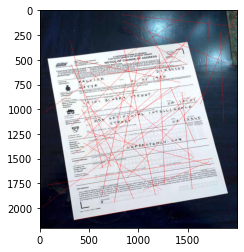

In [22]:
img_output = img.copy()
print(actual_points)
for x1,y1,x2,y2 in actual_points:
    cv2.line(img_output,(x1,y1),(x2,y2),(255,0,0),1)
img_output = cv2.resize(img_output,(2000,2200))
plt.imshow(img_output)